## Importing related packages
Here we use the cleaned data for drawing plots, used in `Annual_Trip_Insights.pptx`  
The final interactive dashboard is available here:  
[My Tableau Public Page](https://public.tableau.com/app/profile/alireza.mohebbi/viz/Book2_17462764518790/HowdoannualmembersandcasualridersuseCyclisticbikesdifferently)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'monospace'

In [5]:
# Importing cleaned data
annual_trips = pd.read_csv(r"annual_divvy_trips\annual_trips\annual_trips_mar2024_feb2025_v02.csv")
annual_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,length_dif_secs
0,391B0EFEC1CE3771,electric_bike,2024-03-09 17:36:21,2024-03-09 17:36:45,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl,TA1306000002,41.862417,-87.651088,41.862378,-87.651062,member,0 days 00:00:24,6,24
1,44E934751422D15C,classic_bike,2024-03-21 18:40:56,2024-03-21 18:42:14,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961524,-87.691177,41.961524,-87.691177,member,0 days 00:01:18,4,78
2,B725414CC16E5744,classic_bike,2024-03-02 09:16:18,2024-03-02 09:25:17,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,member,0 days 00:08:59,6,539
3,76B839D9F5347C44,classic_bike,2024-03-10 13:58:34,2024-03-10 14:29:33,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,0 days 00:30:59,7,1859
4,00C4D395FD14750F,classic_bike,2024-03-29 14:19:57,2024-03-29 14:46:08,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,41.803038,-87.606615,member,0 days 00:26:11,5,1571


In [7]:
annual_trips["started_at"] = annual_trips["started_at"].astype("datetime64[ns]")
annual_trips["ended_at"] = annual_trips["ended_at"].astype("datetime64[ns]")

In [8]:
annual_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049271 entries, 0 to 4049270
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         object        
 14  day_of_week         int64         
 15  length_dif_secs     int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 494.3+ MB


In [11]:
# Creating month field for further visualizations
annual_trips['month'] = annual_trips['ended_at'].dt.strftime('%b')

In [14]:
# Define a categorical type for month ordering
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

annual_trips['month'] = pd.Categorical(annual_trips['month'], categories=month_order, ordered=True)

annual_trips['month'].value_counts().sort_index()

month
Jan    100211
Feb    108392
Mar    226883
Apr    292124
May    433303
Jun    485164
Jul    530209
Aug    531692
Sep    528688
Oct    440942
Nov    242370
Dec    129293
Name: count, dtype: int64

### Plotting monthly frequency

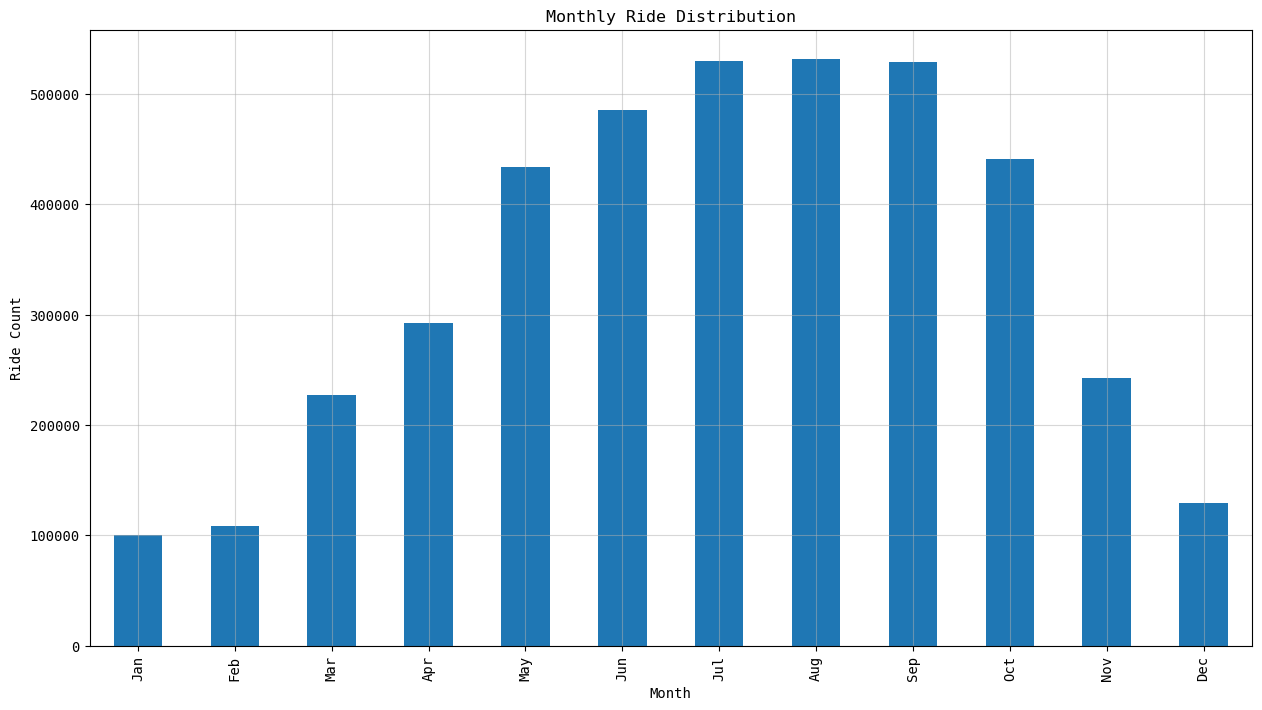

In [31]:
annual_trips['month'].value_counts().sort_index().plot(figsize = (15, 8), kind = 'bar')
plt.xlabel('Month')  # Label for x-axis
plt.ylabel('Ride Count')  # Label for y-axis
plt.title('Monthly Ride Distribution')  # Title of the plot
plt.grid(True, alpha = 0.5)
plt.savefig('monthly_ride_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Group by month and member_casual, then count ride_id
monthly_counts = annual_trips.groupby(['month', 'member_casual'], observed=False)['ride_id'].count().unstack()

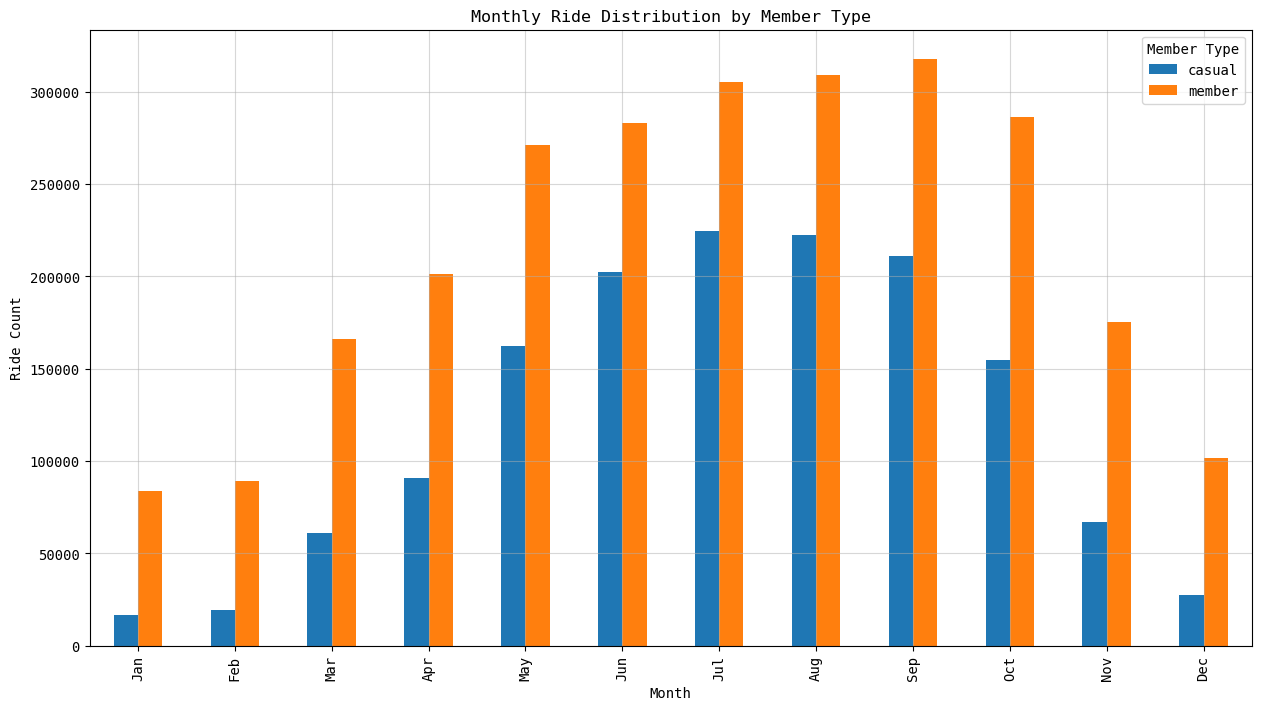

In [32]:
monthly_counts.plot(figsize = (15, 8), kind = 'bar')
plt.xlabel('Month')  # Label for x-axis
plt.ylabel('Ride Count')  # Label for y-axis
plt.title('Monthly Ride Distribution by Member Type')  # Title of the plot
plt.legend(title='Member Type') 
plt.grid(True, alpha = 0.5)
plt.savefig('monthly_ride_distribution_by_member.png', dpi=300, bbox_inches='tight')
plt.show()